# Integrantes

- Ricardo Urbina Ospina  - A00395489

- Julian Mendoza - A00395237

- Kevin Nieto Curaca - A00395466

# **Ensayo: Sistema de Reconocimiento de Actividad Humana y Análisis Postural en Tiempo Real mediante Visión por Computadora**

## Abstract

El reconocimiento de la actividad humana (HAR, por sus siglas en inglés) es un campo de creciente interés en la inteligencia artificial, con aplicaciones que van desde la rehabilitación médica y el análisis deportivo hasta la interacción hombre-máquina. Este ensayo detalla la concepción y el plan de desarrollo de un sistema de software capaz de clasificar cinco actividades humanas fundamentales (caminar, girar, sentarse, levantarse) y analizar métricas posturales clave en tiempo real. Adoptando la metodología CRISP-DM, el proyecto aborda el ciclo de vida completo de un sistema de aprendizaje automático, desde la comprensión del problema y la recolección de datos hasta el despliegue de un prototipo funcional. La estrategia central se basa en la extracción de landmarks corporales mediante la librería MediaPipe Pose, seguida de un proceso de ingeniería de características para generar vectores descriptivos de la postura y el movimiento. Estos vectores, sincronizados y etiquetados a nivel de frame, constituyen el insumo para entrenar y evaluar modelos de clasificación supervisada como SVM, Random Forest y XGBoost. El objetivo es alcanzar un F1-Score superior al 90% y un rendimiento en tiempo real (≥10 FPS), validando la viabilidad de utilizar datos esqueléticos para una clasificación de actividades precisa y eficiente.

---

## 1. Introducción

La capacidad de interpretar y comprender el movimiento humano a través de medios visuales es una tarea intrínsecamente compleja que los sistemas de visión por computadora modernos están comenzando a dominar. El desarrollo de sistemas HAR robustos y en tiempo real abre un abanico de posibilidades en dominios críticos como la monitorización de pacientes, la ergonomía en el lugar de trabajo, los sistemas de vigilancia inteligente y las interfaces de usuario gestuales.

Este proyecto se enfoca en el desarrollo de una solución integral que no solo clasifica acciones dinámicas, sino que también cuantifica la calidad del movimiento a través del análisis postural. El objetivo es claro: crear una herramienta que, utilizando una cámara web estándar, pueda identificar si una persona está caminando, girando, sentándose o levantándose, y simultáneamente calcular ángulos articulares relevantes (rodillas, caderas) y la inclinación del tronco.

Para asegurar un desarrollo estructurado y riguroso, el proyecto se articula en torno a la metodología **CRISP-DM (Cross-Industry Standard Process for Data Mining)**. Este marco de trabajo, probado en la industria, divide el proyecto en seis fases iterativas: Comprensión del Problema, Comprensión de los Datos, Preparación de los Datos, Modelado, Evaluación y Despliegue. A través de este ensayo, se detallará cada una de estas fases, con un énfasis particular en el proceso clave que transforma los datos de video en bruto en un conjunto de datos estructurado y significativo, listo para alimentar a los algoritmos de aprendizaje automático.

---

## 2. Estado del Arte

El campo del Reconocimiento de Actividad Humana (HAR) ha evolucionado significativamente en las últimas décadas, explorando diversas modalidades de datos y técnicas de modelado. Históricamente, los primeros enfoques se basaban en **sensores vestibles** (wearables), como acelerómetros y giroscopios integrados en smartphones o dispositivos dedicados. Estos métodos son eficientes en términos computacionales y precisos para actividades rítmicas (correr, caminar), pero requieren que el usuario lleve un dispositivo y son menos efectivos para capturar posturas complejas.

La transición hacia los **enfoques basados en visión** eliminó la necesidad de instrumentar al usuario, abriendo el campo a aplicaciones más flexibles. Las primeras técnicas de visión por computadora se centraban en características globales del video, como el flujo óptico (optical flow) o los histogramas de gradientes orientados (HOG), para capturar el movimiento y la forma. Sin embargo, estos métodos eran sensibles a las variaciones de fondo, iluminación y punto de vista.

El avance más disruptivo llegó con el aprendizaje profundo (Deep Learning). Arquitecturas como las Redes Neuronales Convolucionales (CNNs), a menudo combinadas con Redes Neuronales Recurrentes (LSTMs) o Transformers, han alcanzado resultados de vanguardia en benchmarks públicos como UCF101, HMDB51 y Kinetics. Estos modelos aprenden jerarquías de características directamente de los píxeles del video, capturando complejas dependencias espaciales y temporales. No obstante, su principal inconveniente es el alto costo computacional, que a menudo exige hardware especializado (GPUs) para el entrenamiento y la inferencia en tiempo real, limitando su despliegue en dispositivos estándar.

En este contexto, surge un enfoque híbrido que se ha consolidado como una alternativa potente y eficiente: elHAR basado en estimación de la pose (Pose Estimation). Herramientas de última generación como MediaPipe, OpenPose o AlphaPose pueden extraer con alta precisión la ubicación de los puntos clave del esqueleto humano (landmarks) en tiempo real y desde una simple cámara 2D. Este enfoque ofrece un punto intermedio ideal:
* **Eficiencia**: En lugar de procesar millones de píxeles, el problema se reduce a analizar la dinámica de unas pocas decenas de coordenadas (los 33 landmarks de MediaPipe).
* **Robustez**: La representación esquelética es inherentemente invariante a la textura de la ropa, las condiciones de iluminación y los fondos complejos.
* **Interpretabilidad**: Las características derivadas del esqueleto (ángulos articulares, distancias) tienen un significado biomecánico directo, a diferencia de las características abstractas aprendidas por una CNN.

Este proyecto se posiciona estratégicamente en esta última corriente. Al desacoplar la percepción visual (extracción de landmarks) del razonamiento (clasificación con modelos como SVM o XGBoost), se busca desarrollar un sistema que no solo sea preciso, sino también lo suficientemente ligero para operar de manera fluida en computadoras convencionales, logrando el equilibrio perfecto entre rendimiento y accesibilidad.

---

## 3. Tecnologías y Herramientas

La ejecución de este proyecto se apoya exclusivamente en un ecosistema de tecnologías de código abierto (Open Source), lo que garantiza la reproducibilidad, la transparencia y la ausencia de costos de licencia. El stack tecnológico seleccionado es un estándar de facto en la comunidad de ciencia de datos y visión por computadora.

* **Python**: Es el lenguaje de programación central del proyecto. Su sintaxis limpia y el vasto ecosistema de librerías científicas lo convierten en la elección ideal para el desarrollo rápido de prototipos y sistemas robustos.

* **MediaPipe**: Desarrollado por Google, es el framework utilizado para la estimación de la pose en tiempo real. Su solución *MediaPipe Pose* es altamente optimizada para ejecutarse eficientemente en CPUs estándar, proporcionando las coordenadas 3D de 33 landmarks corporales con alta precisión. Es una pieza clave y open source.

* **OpenCV (Open Source Computer Vision Library)**: Esta librería es fundamental para todas las operaciones relacionadas con el video. Se utiliza para capturar el flujo de video desde la cámara, procesar cada frame y, lo más importante, para renderizar la interfaz gráfica (GUI) final, dibujando el esqueleto, las etiquetas y los ángulos sobre la imagen en tiempo real.

* **LabelStudio**: Es la herramienta open source seleccionada para la anotación de datos. Su flexibilidad para manejar secuencias de tiempo en videos permite un etiquetado preciso de los segmentos donde ocurren las actividades de interés, generando los archivos de anotaciones que son cruciales para el entrenamiento supervisado.

* **Scikit-learn**: Es la librería de aprendizaje automático por excelencia en Python. Se utilizará para implementar los modelos de Support Vector Machine (SVM) y Random Forest, así como para las tareas de preprocesamiento, división de datos y evaluación de métricas (F1-Score, matriz de confusión). También es open source.

* **XGBoost**: Una implementación optimizada y distribuida del algoritmo de gradient boosting. Se seleccionó por su reputación de alcanzar un rendimiento superior en datos tabulares estructurados, como los vectores de características que se generarán. Es una librería open source de alto rendimiento.

* **Pandas y NumPy**: Son las librerías fundamentales para la manipulación de datos en Python. NumPy se usará para operaciones numéricas eficientes sobre los arrays de coordenadas y vectores, mientras que Pandas se utilizará para estructurar el dataset final en un formato tabular (DataFrame) fácil de manejar. Ambas son open source.

---

## 4. Temario: Desarrollo del Proyecto bajo la Metodología CRISP-DM

#### 4.1. Fase 1: Comprensión del Problema y Objetivos

El punto de partida es la definición precisa de las metas del proyecto y las métricas que determinarán su éxito. El objetivo principal es desarrollar un sistema de visión por computadora que cumpla con tres funcionalidades clave: clasificación de actividades, análisis postural y visualización en tiempo real. Las cinco actividades seleccionadas son fundamentales en la motricidad humana y representan transiciones posturales y movimientos locomotores comunes.

#### 4.2. Fase 2: Comprensión y Obtención de los Datos

Un modelo de aprendizaje automático es tan bueno como los datos con los que se entrena. La fuente primaria será un dataset propio, creado mediante la grabación controlada de videos para garantizar la relevancia y variabilidad de los datos. Como estrategia de contingencia, se contempla el uso de fuentes secundarias de bases de datos públicas para aumentar el volumen y la robustez.

#### 4.3. Fase 3: Preparación de los Datos (El Puente entre el Video y el Modelo)

Esta es la fase técnicamente más densa. Aquí es donde se materializa la idea de asociar los frames del video con vectores de posición para el entrenamiento.


1.  **Anotación Temporal**: Con **LabelStudio**, se etiquetan segmentos de tiempo en los videos.
2.  **Extracción de Landmarks y Sincronización**: Un script procesa cada video frame por frame, asigna la etiqueta correspondiente según el timestamp y extrae las coordenadas del esqueleto con **MediaPipe**.
3.  **Ingeniería de Características**: Para cada frame etiquetado, las coordenadas se transforman en un **vector de características** robusto (ángulos normalizados, velocidades, etc.), creando una tabla de datos estructurada que será el insumo para el modelado.

#### 4.4. Fase 4: Modelado

Con el conjunto de datos preparado, se procede a entrenar y comparar los tres modelos de clasificación supervisada (**SVM, Random Forest, XGBoost**) utilizando **Scikit-learn** y **XGBoost**. Se aplicará validación cruzada para un ajuste de hiperparámetros riguroso.

#### 4.5. Fase 5: Evaluación

La evaluación será **cuantitativa** (Precisión, Recall, F1-Score, matriz de confusión) sobre el conjunto de prueba y **cualitativa**, mediante pruebas en vivo para verificar la estabilidad y el rendimiento del sistema en tiempo real.

#### 4.6. Fase 6: Despliegue

Se construirá la aplicación final en Python usando **OpenCV** para gestionar la cámara. Un bucle en tiempo real capturará frames, calculará el vector de características, obtendrá una predicción del modelo cargado y visualizará toda la información en pantalla.

---

## 5. Análisis de Aspectos Éticos

El desarrollo de esta tecnología conlleva responsabilidades. Este proyecto abordará explícitamente tres áreas éticas clave:
* **Consentimiento y Privacidad**: Se obtendrá consentimiento informado de todos los participantes, garantizando el uso anónimo y académico de los datos.
* **Sesgo en los Datos (Bias)**: Se reconocerá y documentará como una limitación los posibles sesgos del dataset (demográficos, físicos), que podrían afectar la generalización del modelo.
* **Uso Indebido**: Se discutirá el potencial dual de la tecnología y se abogará por su implementación ética y transparente.
**texto en negrita**
---

## 6. Conclusión

Este proyecto representa una aplicación integral de técnicas de visión por computadora y aprendizaje automático para resolver un problema práctico y relevante. Siguiendo la metodología CRISP-DM y apoyándose en un stack tecnológico completamente open source, se asegura un proceso lógico y reproducible. El núcleo técnico del proyecto —la transformación de secuencias de píxeles en vectores de características biomecánicas— no solo permite la clasificación de actividades, sino que sienta las bases para un análisis más profundo del movimiento humano. El éxito de este sistema demostrará la potencia de los modelos basados en landmarks como una alternativa eficiente y ligera a los modelos de redes neuronales profundas que procesan video en bruto, abriendo la puerta a futuras aplicaciones en dispositivos con recursos computacionales limitados.

# Diagrama de la solución:




## Entrenamiento del modelo

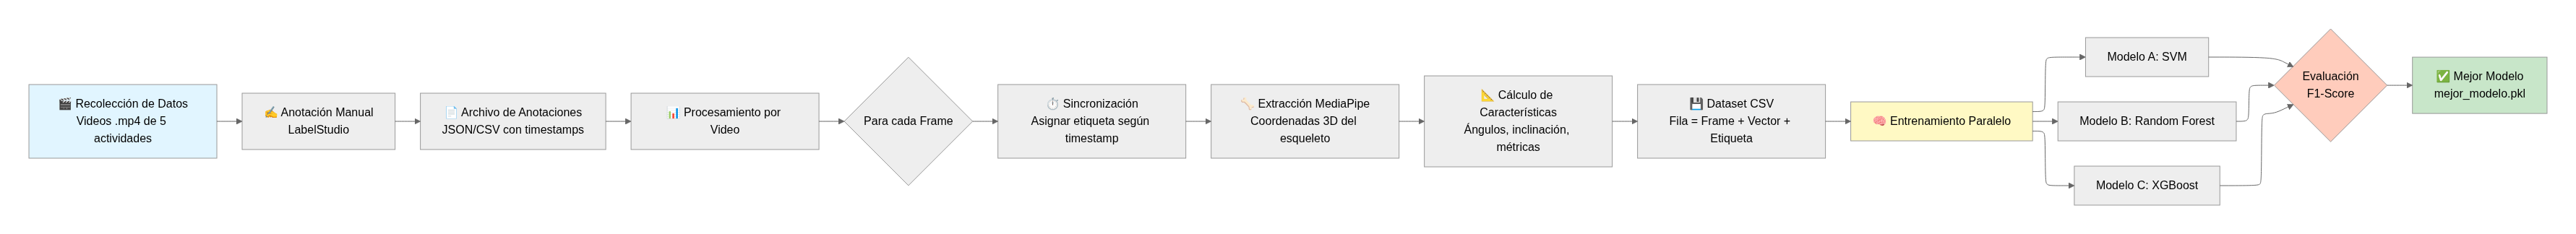

## Aplicación en tiempo real

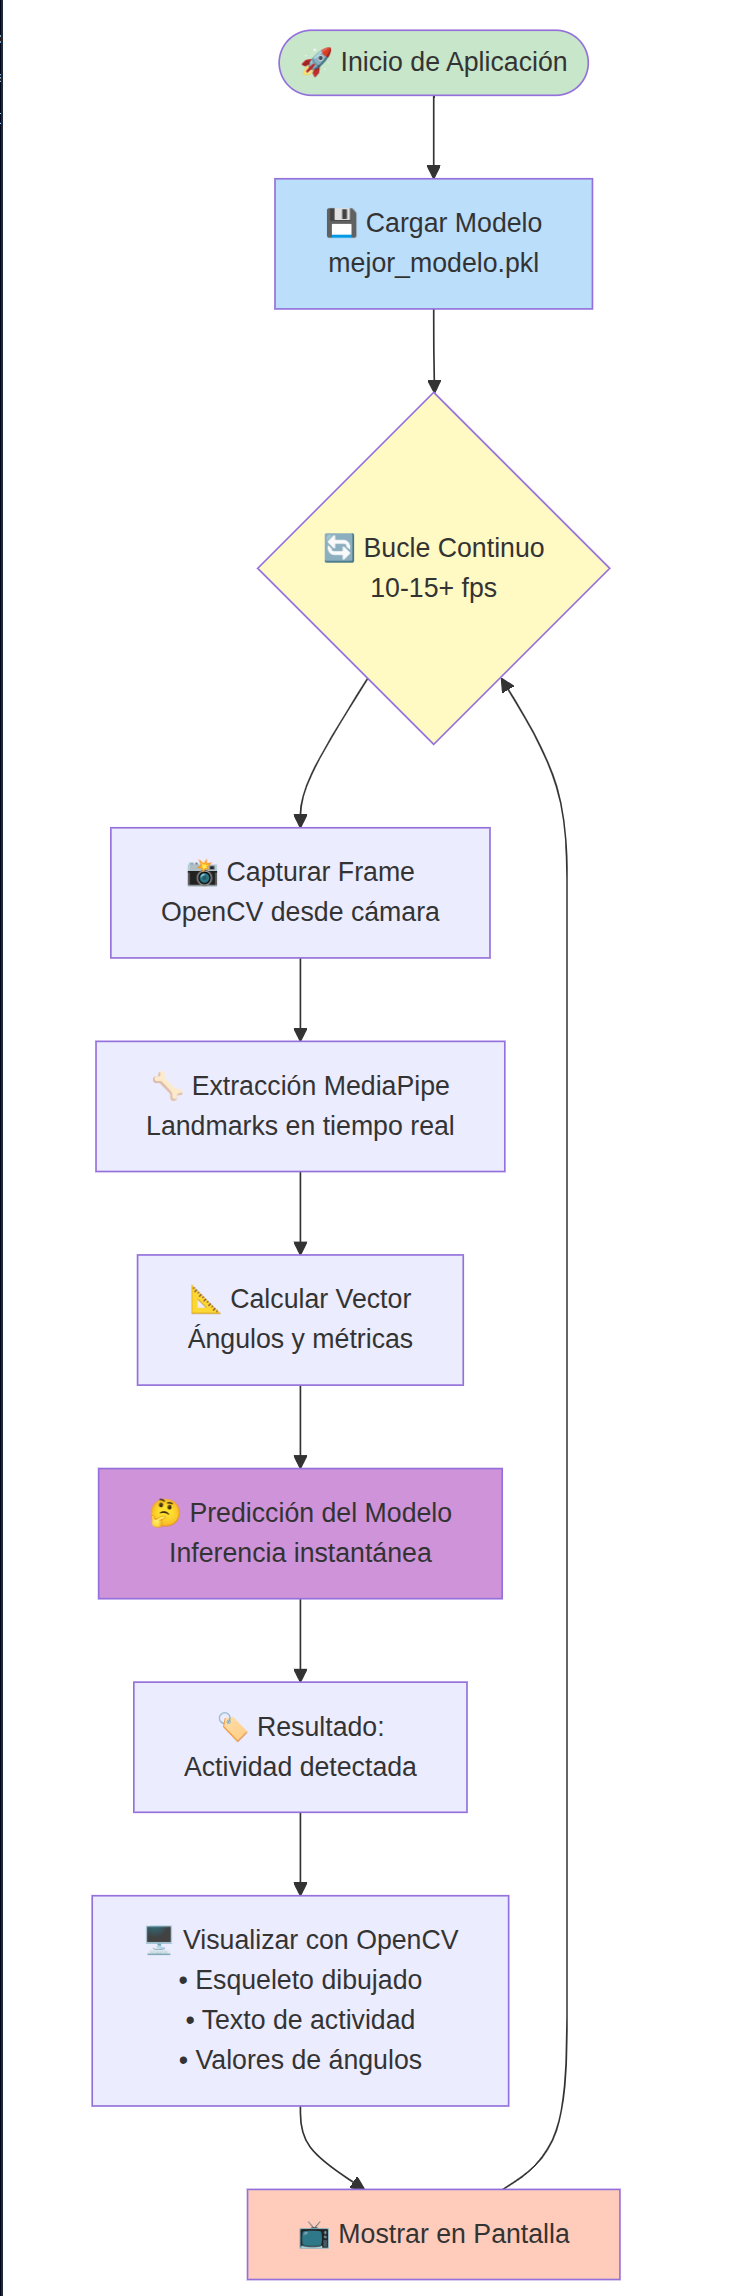

# Plan de Trabajo y Cronograma por Entregable

| Semana | Hito Clave | Tareas Específicas | Entregable Asociado |
| :--- | :--- | :--- | :--- |
| *Semanas 9-11* | Definición y Recolección | - Definir objetivos, métricas y preguntas.<br>- Planificar y grabar el dataset de video.<br>- Empezar la anotación con LabelStudio.<br>- Escribir el informe de la primera entrega. | *Entrega 1* (Semana 12) |
| *Semana 12* | *Entrega 1* | - Presentar preguntas, metodología, métricas.<br>- Mostrar el dataset recolectado y el plan de anotación.<br>- Realizar un análisis exploratorio inicial.<br>- Incluir el análisis de aspectos éticos. | |
| *Semana 13* | Preprocesamiento y Modelado | - Finalizar la anotación de datos.<br>- Desarrollar scripts para extraer landmarks y generar features.<br>- Entrenar las versiones iniciales de los modelos (SVM, RF, XGBoost).<br>- Realizar el ajuste de hiperparámetros. | *Entrega 2* (Semana 14) |
| *Semana 14* | *Entrega 2* | - Presentar la preparación de datos y el entrenamiento.<br>- Mostrar resultados preliminares (métricas, gráficas).<br>- Presentar el plan de despliegue y análisis inicial de impacto. | |
| *Semanas 15-16| Despliegue y Refinamiento| - Desarrollar la aplicación en tiempo real con OpenCV.<br>- Integrar el mejor modelo entrenado.<br>- Realizar pruebas y refinar la visualización.<br>- Trabajar en el informe final y el video de presentación. | **Entrega 3* (Semana 17) |
| *Semana 17* | *Entrega 3* | - Presentar la solución final desplegada.<br>- Mostrar la evaluación final de resultados.<br>- Entregar el reporte final, el video y el repositorio de GitHub completo. | |




# Referencias

## Reconocimiento de Actividad Humana (HAR) y Visión por Computadora

    Poppe, R. (2010). A Survey on Vision-Based Human Action Recognition. Image and Vision Computing, 28(6), 976-990. Revisión de técnicas clásicas y modernas en reconocimiento visual de acciones humanas.
    Link: https://www.sciencedirect.com/science/article/pii/S0262885609001602

    Wang, J. et al. (2019). Deep Learning for Sensor-Based Activity Recognition: A Survey. Pattern Recognition Letters, 119, 3-11. Análisis de métodos con aprendizaje profundo para HAR.
    Link: https://www.sciencedirect.com/science/article/pii/S0167865519302645

## Pose Estimation: MediaPipe, OpenPose, AlphaPose

    Bazarevsky, V. et al. (2020). MediaPipe Pose: On-device Realtime Body Pose Tracking. arXiv preprint arXiv:2006.10204.
    Link: https://arxiv.org/abs/2006.10204

    Fang, H. S. et al. (2017). RMPE: Regional Multi-Person Pose Estimation. ICCV 2017.
    Link: https://openaccess.thecvf.com/content_ICCV_2017/html/Fang_RMPE_Regional_Multi-Person_ICCV_2017_paper.html

## Deep Learning en HAR (CNNs, LSTMs, Transformers)

    Donahue, J. et al. (2015). Long-Term Recurrent Convolutional Networks for Visual Recognition and Description. CVPR 2015.
    Link: https://www.cv-foundation.org/openaccess/content_cvpr_2015/html/Donahue_Long-Term_Recurrent_Convolutional_2015_CVPR_paper.html


## Modelos SVM, Random Forest y XGBoost

    Cortes, C., & Vapnik, V. (1995). Support-Vector Networks. Machine Learning, 20(3), 273-297.
    Link: https://link.springer.com/article/10.1007/BF00994018

    Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
    Link: https://link.springer.com/article/10.1023/A:1010933404324

    Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. KDD 2016.
    Link: https://dl.acm.org/doi/10.1145/2939672.2939785

